In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [35]:
df = pd.read_csv("regressiondata.csv")

In [36]:
df.head()

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
0,0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,1,2021.04,36.0,659.924963,3.0,5222.0,547714
2,2,2019.04,38.0,305.475941,7.0,5213.0,277232
3,3,2021.10,11.0,607.034754,5.0,5213.0,295958
4,4,2021.02,14.0,378.827222,5.0,5614.0,439963


In [37]:
df.tail()

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
9351,9351,2019.07,36.0,554.324820,3.0,5217.0,420246
9352,9352,2021.02,21.0,2296.349397,4.0,5614.0,256087
9353,9353,2020.11,18.0,856.174897,0.0,5614.0,257663
9354,9354,2021.10,6.0,87.260667,9.0,5614.0,681072
9355,9355,2020.12,20.0,584.007146,4.0,5614.0,403096


In [38]:
len(df)

9356

# Split the Data into traing and testing Data

Traning Data = Will use this data to train model.

Test Data = Will use this data to test model


In [39]:
train,test =train_test_split(df,test_size=0.3,random_state=1234)

In [40]:
train.head()

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
8450,8450,2021.02,34.0,460.994365,8.0,5614.0,460286
5758,5758,2020.01,17.0,614.851833,3.0,5213.0,253332
4030,4030,2021.06,34.0,285.892687,9.0,5614.0,486532
8447,8447,2020.12,0.0,195.213314,6.0,5222.0,595168
4370,4370,2019.03,34.0,124.082230,8.0,5212.0,250495


In [41]:
test.head()

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
7857,7857,2021.11,0.0,267.000535,6.0,5222.0,919497
1641,1641,2021.04,12.0,500.080510,5.0,5212.0,283680
3620,3620,2019.07,14.0,4024.663391,0.0,5614.0,135818
2820,2820,2020.09,18.0,568.954185,4.0,5614.0,468742
1572,1572,2020.07,11.0,44.210016,1.0,5614.0,311065


In [42]:
## EXplorartory Data Analysis

In [43]:
train.dtypes

ID                     int64
TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6549 entries, 8450 to 8915
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 6549 non-null   int64  
 1   TransactionDate    6548 non-null   float64
 2   HouseAge           6546 non-null   float64
 3   DistanceToStation  6547 non-null   float64
 4   NumberOfPubs       6547 non-null   float64
 5   PostCode           6547 non-null   float64
 6   HousePrice         6544 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 409.3+ KB


In [45]:
train.describe()

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
count,6549.000000,6548.000000,6546.000000,6547.000000,6.547000e+03,6547.000000
mean,4679.556268,2020.072389,17.375344,1091.759504,7.677828e+02,5294.499160
std,2702.123924,0.815922,11.469272,1270.038426,6.179430e+04,158.397718
min,3.000000,2019.010000,0.000000,23.829424,0.000000e+00,5212.000000
25%,2373.000000,2019.100000,9.000000,268.649033,1.000000e+00,5213.000000
50%,4678.000000,2020.070000,15.000000,545.312168,4.000000e+00,5217.000000
75%,7025.000000,2021.040000,28.000000,1529.343484,6.000000e+00,5222.000000
max,9355.000000,2021.120000,43.000000,6486.256457,4.999999e+06,5614.000000


In [46]:
train["TransactionDate"] = train["TransactionDate"].astype(str)
train["PostCode"] = train["PostCode"].astype(str)

In [47]:
train.dtypes

ID                     int64
TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice            object
dtype: object

In [48]:
train.describe(include='object')

,TransactionDate,PostCode,HousePrice
count,6549,6549,6544
unique,37,6,6496
top,2019.01,5212.0,290262
freq,212,1338,2


## Analyse Numerical Columns


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6549 entries, 8450 to 8915
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 6549 non-null   int64  
 1   TransactionDate    6549 non-null   object 
 2   HouseAge           6546 non-null   float64
 3   DistanceToStation  6547 non-null   float64
 4   NumberOfPubs       6547 non-null   float64
 5   PostCode           6549 non-null   object 
 6   HousePrice         6544 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 409.3+ KB


In [50]:
train.shape

(6549, 7)

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'HouseAge'}>],
       [<Axes: title={'center': 'DistanceToStation'}>,
        <Axes: title={'center': 'NumberOfPubs'}>]], dtype=object)

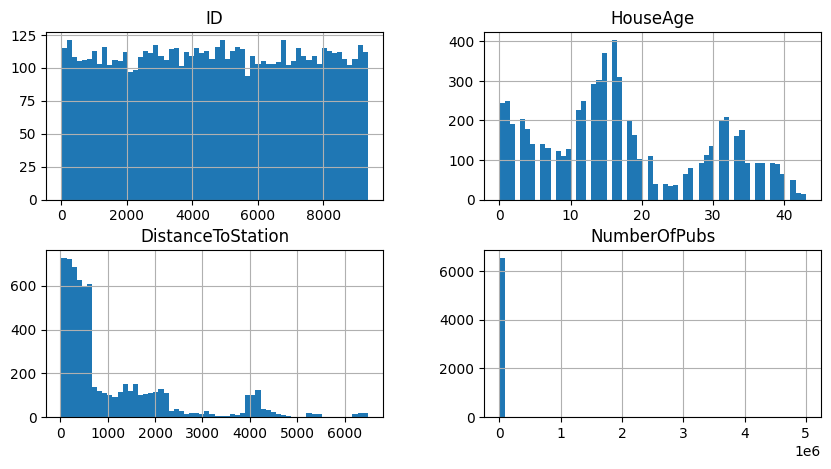

In [51]:
#Plot distributions
train.hist(figsize=(10,5),bins =60)

In [52]:
train['HousePrice'].astype(float)

ValueError: could not convert string to float: '??'

In [53]:
train[train['HousePrice'] == "??"]

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
8718,8718,2020.08,16.0,122.432508,5.0,5213.0,??


In [54]:
train = train[train['HousePrice'] != "??"]

In [55]:
train[train['HousePrice'] == "??"]

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice


In [57]:
train['HousePrice'] = train['HousePrice'].astype(float)

In [59]:
train.dtypes

ID                     int64
TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

<Axes: ylabel='HousePrice'>

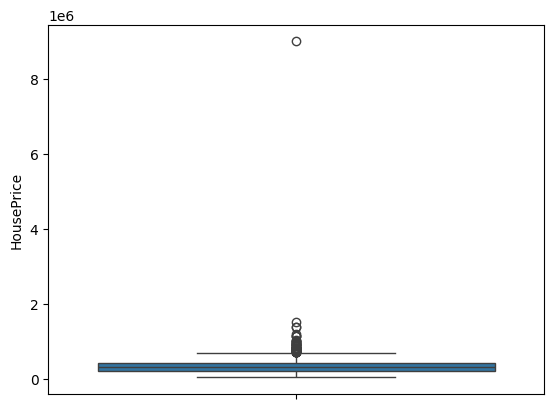

In [64]:
sns.boxplot(train['HousePrice'])

In [65]:
train.sort_values('HousePrice').tail(10)

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
9238,9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8445,8445,2021.05,0.0,276.789752,9.0,5222.0,8989772.0
8103,8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,8112,2019.08,20.0,370.088151,NaN,nan,NaN
7670,7670,2020.12,13.0,1837.649999,2.0,nan,NaN


In [66]:
train = train.drop(8445)

<Axes: ylabel='HousePrice'>

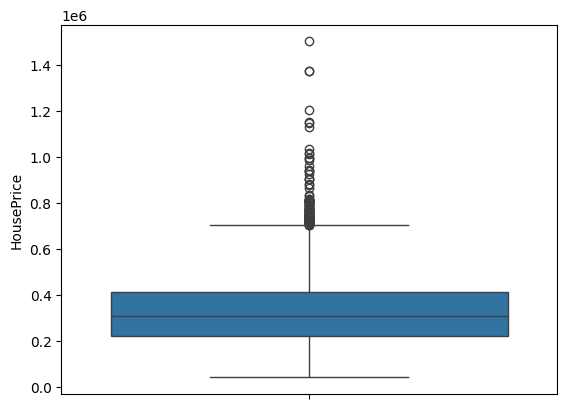

In [67]:
sns.boxplot(train['HousePrice'])

<Axes: ylabel='NumberOfPubs'>

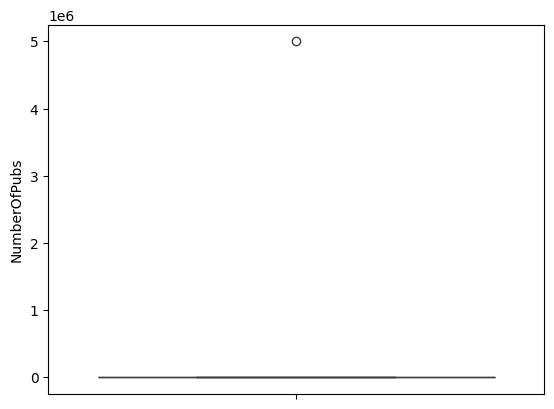

In [68]:
sns.boxplot(train['NumberOfPubs'])

In [69]:
train.sort_values('NumberOfPubs').tail(10)

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
5334,5334,2021.07,33.0,130.200701,10.0,5212.0,326772.0
4738,4738,2021.11,34.0,42.324197,10.0,5614.0,518639.0
1046,1046,2020.01,23.0,568.984852,10.0,5213.0,312165.0
6257,6257,2019.01,34.0,98.166618,10.0,5222.0,489487.0
2916,2916,2021.06,8.0,656.962289,10.0,5217.0,511688.0
422,422,2019.1,32.0,164.514773,10.0,5614.0,346126.0
5763,5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
13,13,2019.05,8.0,273.264542,4999999.0,5213.0,356012.0
2416,2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
8112,8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [70]:
train = train.drop(13)

<Axes: ylabel='NumberOfPubs'>

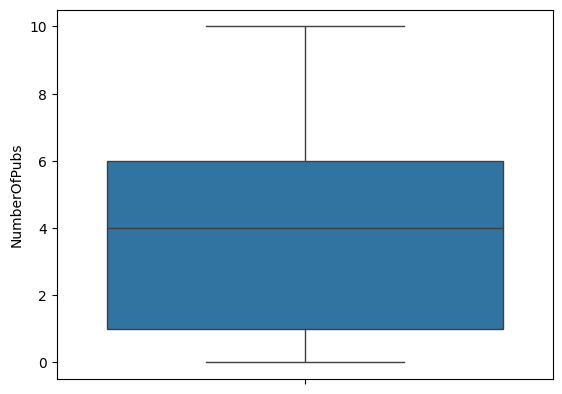

In [71]:
sns.boxplot(train['NumberOfPubs'])

<Axes: ylabel='DistanceToStation'>

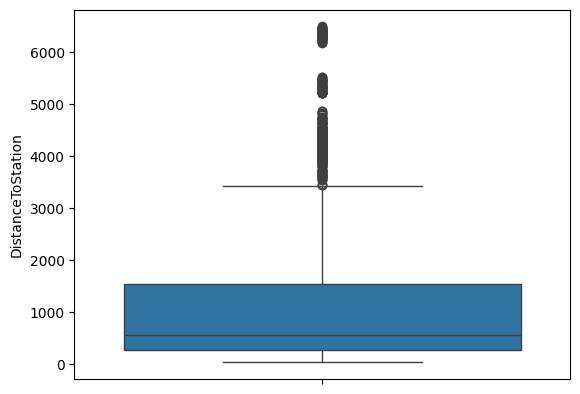

In [72]:
sns.boxplot(train['DistanceToStation'])